

# Project: Investigate TMDb Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- In this project, I am going to investigate dataset collected from The Movie Database (TMDb). This dataset includes many useful data that can used to analyze the film industry during the period of 1960 till 2015 and draw conclusions and insights on how film characteristics (genre) influence the financial performance and consumer behaviour during this period. 

- I am also investigating the financial performace in terms of budget, revenue, and profit of the film industry during the examined period. 

- Finally, gathering some insights of the top 10 perfoming films/directors/actors in terms on revenues, profit, and user rating. 

- The questions this analysis is addressing as below: 


#### Question 1: How the film genre is associated with revunue, popularity, and user voting?

#### Question 2: How the budget, revunue, and profit of the film industry were perfoming over the time?                                     

#### Question 3: Who are the top 10 perfoming films/directors/actors in terms of revenues and popularity?



In [1]:
# import statements for all of the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns
import re


<a id='wrangling'></a>
## Data Wrangling

### Gathering Data:

- Load the data from CSV file and make it DataFrame.
- Inspect the DataFrame for quality and tidiness issues.

### Assessing Data: 

#### Quality issues: 

- Duplicate rows (imdb_id)
 
- Missing values NAN (genres),(cast),(director)
 
- Inconsistant data (genres),(cast),(director)
 
- Invalid data type int64 instead of datetime (release_year)

- Incorrect/misspelled data (directors)/(film_name)
 
#### Tidiness issues:

- Reduandant columns (id,revenue,budget,relaease_date)
 
- Trivial/unnecessary columns for analysis (homepage,tagline,keywords,overview,production_compnies)
 
- Non descriptive headers name (budget_adj, revenue_adj,cast,original_title)

### Cleaning Data: 

- Define, code and test are presented above each cleaning act.


In [2]:
# Load data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Check the ending records in the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
#Get the dataset details (rows,columns)
df.shape

(10866, 21)

In [6]:
#Get the dataset statistical summary 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning:

- Remove duplicates(id)
- Drop reduandant columns(imdb_id,revenue, budget,relaease_date)
- Drop trivial columns(homepage,tagline,keywords,overview,production_compnies)
- Replace non descriptive headers name to meaningful ones (revenue_adj,budget_adj,cast,original_title)
- Drop missing values NAN (geners,director)
- Correct data type of (release_year) to be Datetime instead of int64 
- Fix inconsistant data (genres,director,actor)
- Correct the misspelled names/wrong encoding (director,film_name)




In [7]:
# check for duplicates rows if any.
sum(df["id"].duplicated())


1

In [8]:
# Define: remove the duplicate row
duplicate_row = df[df.duplicated()]
print(duplicate_row)


         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [9]:
# Show the duplicated rows
df[df["imdb_id"] == "tt0411951"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# Code & test:
df.drop_duplicates(inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [11]:
# Define: drop reduandant columns(imdb_id,revenue, budget,relaease_date)
# Code:
columns = ["id","revenue","budget","release_date"]
df.drop(columns, inplace=True, axis=1)


In [12]:
# test: 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10855 non-null  object 
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   homepage              2936 non-null   object 
 5   director              10821 non-null  object 
 6   tagline               8041 non-null   object 
 7   keywords              9372 non-null   object 
 8   overview              10861 non-null  object 
 9   runtime               10865 non-null  int64  
 10  genres                10842 non-null  object 
 11  production_companies  9835 non-null   object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
 15  budget_adj         

In [13]:
# Define: drop trivial columns(homepage,tagline,keywords,overview)
# Code: 
columns_trivial = ["homepage","tagline","keywords","overview","production_companies"]
df.drop(columns_trivial, inplace=True, axis=1)

In [14]:
# test: 
df.head()

,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
# Define: replace non descriptive headers name to meaningful ones.
# Code & test:
df.rename(columns={"budget_adj": "budget","revenue_adj": "revenue","original_title":"film_name","cast":"actor"}, inplace=True)

In [16]:
# Define: drop missing values NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10855 non-null  object 
 1   popularity    10865 non-null  float64
 2   film_name     10865 non-null  object 
 3   actor         10789 non-null  object 
 4   director      10821 non-null  object 
 5   runtime       10865 non-null  int64  
 6   genres        10842 non-null  object 
 7   vote_count    10865 non-null  int64  
 8   vote_average  10865 non-null  float64
 9   release_year  10865 non-null  int64  
 10  budget        10865 non-null  float64
 11  revenue       10865 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [17]:
# Code & test:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10726 non-null  object 
 1   popularity    10726 non-null  float64
 2   film_name     10726 non-null  object 
 3   actor         10726 non-null  object 
 4   director      10726 non-null  object 
 5   runtime       10726 non-null  int64  
 6   genres        10726 non-null  object 
 7   vote_count    10726 non-null  int64  
 8   vote_average  10726 non-null  float64
 9   release_year  10726 non-null  int64  
 10  budget        10726 non-null  float64
 11  revenue       10726 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [18]:
# Get the updated shape of Dataset
df.shape

(10726, 12)

In [19]:
#Define: correct data type of (release_year) to be Datetime instead of int64 
#Code:
df["release_year"] = pd.to_datetime(df.release_year)


In [20]:
# Test 
df.release_year.dtype

dtype('<M8[ns]')

In [21]:
df.nunique()

imdb_id         10726
popularity      10679
film_name       10434
actor           10661
director         5016
runtime           243
genres           2020
vote_count       1289
vote_average       70
release_year       56
budget           2602
revenue          4835
dtype: int64

In [22]:
# Ivestigate the dataset with descriptive statistics:
df.describe()

,popularity,runtime,vote_count,vote_average,budget,revenue
count,10726.000000,10726.000000,10726.000000,10726.000000,1.072600e+04,1.072600e+04
mean,0.652779,102.493660,219.905090,5.964218,1.777358e+07,5.203047e+07
std,1.004995,30.473355,578.934433,0.930185,3.447220e+07,1.454547e+08
min,0.000188,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.210766,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.387135,99.000000,39.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.721518,112.000000,148.000000,6.600000,2.112691e+07,3.475061e+07
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [23]:
#Define: fix inconsistant data (genres)
df.genres.value_counts()

Drama                                     710
Comedy                                    707
Drama|Romance                             289
Comedy|Drama                              280
Documentary                               274
                                         ... 
Drama|Comedy|Music|Romance|Family           1
Mystery|Drama|Science Fiction|Thriller      1
Science Fiction|Thriller|Drama|Crime        1
Horror|Drama|Thriller|Crime                 1
Romance|Fantasy|Horror                      1
Name: genres, Length: 2020, dtype: int64

In [24]:
#Code:
df["genres"]= df["genres"].str.split("|", n = 1, expand = True)

In [25]:
#Test:
df.genres.value_counts()

Drama              2443
Comedy             2313
Action             1584
Horror              914
Adventure           584
Thriller            491
Documentary         387
Crime               380
Animation           374
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: genres, dtype: int64

In [26]:
#Define: fix inconsistant data (director)
df.director.value_counts()

Woody Allen                      45
Clint Eastwood                   34
Steven Spielberg                 29
Martin Scorsese                  28
Ridley Scott                     23
                                 ..
Derek Jarman                      1
Dorian Walker                     1
Corey Yuen Kwai|Patrick Leung     1
HernÃ¡n Goldfrid                  1
Kieran Darcy-Smith                1
Name: director, Length: 5016, dtype: int64

In [27]:
#Code:
df["director"]= df["director"].str.split("|", n = 1, expand = True)

In [28]:
#Test:
df.director.value_counts()

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
                    ..
Jed Mercurio         1
David Gregory        1
Paddy Considine      1
Stephen Cragg        1
John Simpson         1
Name: director, Length: 4791, dtype: int64

In [29]:
#Define: fix inconsistant data (actor)
df.actor.value_counts()

Louis C.K.                                                                     6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei        5
Aziz Ansari                                                                    3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu             3
Pierre Coffin                                                                  3
                                                                              ..
Bruce Campbell|Chandra West|Kiele Sanchez|John Diehl|Kiele Sanchez             1
Adam Sandler|Patricia Arquette|Harvey Keitel|Rhys Ifans|Tommy 'Tiny' Lister    1
Maggie Gyllenhaal|Hugh Dancy|Jonathan Pryce|Felicity Jones|Rupert Everett      1
Aaron Swartz|Tim Berners-Lee|Cory Doctorow|Peter Eckersley|Lawrence Lessig     1
Kevin Bacon|Elizabeth Perkins|Nathan Lane|Anthony LaPaglia|Sharon Stone        1
Name: actor, Length: 10661, dtype: int64

In [30]:
#Code:
df["actor"]= df["actor"].str.split("|", n = 1, expand = True)

In [31]:
#Test:
df.actor.value_counts()

Nicolas Cage        50
Robert De Niro      42
Bruce Willis        39
Clint Eastwood      38
Johnny Depp         37
                    ..
Abigail Schrader     1
Randy Orton          1
Frances Barber       1
Barney Clark         1
Dylan Neal           1
Name: actor, Length: 4271, dtype: int64

In [32]:
# Get the dataframe preview:
df

,imdb_id,popularity,film_name,actor,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,tt0369610,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,tt0060371,0.080598,The Endless Summer,Michael Hynson,Bruce Brown,95,Documentary,11,7.4,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10862,tt0060472,0.065543,Grand Prix,James Garner,John Frankenheimer,176,Action,20,5.7,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10863,tt0060161,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy,Eldar Ryazanov,94,Mystery,11,6.5,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10864,tt0061177,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi,Woody Allen,80,Action,22,5.4,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00


In [33]:
# Inspect director column:
df.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8                        Kyle Balda
9                       Pete Docter
Name: director, dtype: object

In [34]:
df.director.loc[10820:10825]

10820               Chuck Jones
10821        FranÃ§ois Truffaut
10822              Mike Nichols
10823               Don Chaffey
10824               John Huston
10825    Michelangelo Antonioni
Name: director, dtype: object

In [35]:
# Define : correct the director misspelled name from "Alejandro GonzÃ¡lez IÃ±Ã¡rritu" to "Alejandro González Iñárritu"
# Code and test
df.at[5,"director"]= "Alejandro González Iñárritu"
df.director[5]

'Alejandro González Iñárritu'

In [36]:
# Define : correct the director misspelled name from "FranÃ§ois Truffaut" to "François Truffaut"
# Code and test
df.at[10821,"director"]= "François Truffaut"
df.director[10821]

'François Truffaut'

In [37]:
#Inspect film_name column:
df.film_name.head()
df.film_name.loc[4825:4835]


4825                                        Mansome
4826    We Are Legion: The Story of the Hacktivists
4827                                       í•˜ìš¸ë§
4828                                The Gatekeepers
4829                                           Rags
4830                                   Simon Killer
4831                                      Redd Inc.
4832                                   Reincarnated
4833                               A Perfect Ending
4834                      Arjun: The Warrior Prince
4835                                    The Barrens
Name: film_name, dtype: object

In [38]:
# Check the incorrect encoding for film_name
df[df.film_name == "í•˜ìš¸ë§"]

,imdb_id,popularity,film_name,actor,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue
4827,tt2186819,0.142769,í•˜ìš¸ë§,Lee Na-young,Yoo Ha,114,Thriller,18,5.8,1970-01-01 00:00:00.000002012,0.0,0.0


In [39]:
# Define: correct film name from "í•˜ìš¸ë§" to "Hawoolling"
# Code :
df.at[4827,"film_name"]= "Hawoolling"


In [40]:
#Test:
df.film_name[4827]

'Hawoolling'

<a id='eda'></a>
## Exploratory Data Analysis

The questions this analysis is addressing as below: 

### Question 1:
How the film genre is associated with revunue, popularity, and user voting?

### Question 2:
How the budget, revunue, and profit of the film industry were perfoming over the time?    

### Question 3:
Who are the top 10 perfoming films/directors/actors in terms of revenues and average voting?


### Research Question 1 (How the film genre is associated with revunue, popularity, and user voting?)
In this question, I am addressing one dependent variable (geners) with three independent variables as follows: 
- Revenue 
- Popularity  
- User Voting (vote_count)

#### The analysis shall be as follows:
-	Statistical data analysis (Absolute and Average Values )
-	Visual data analysis (Absolute and Average Values )

In [41]:
# Get the unique values in genre series
df["genres"].nunique()

20

In [42]:
# Get the values count per each genre
df["genres"].value_counts()

Drama              2443
Comedy             2313
Action             1584
Horror              914
Adventure           584
Thriller            491
Documentary         387
Crime               380
Animation           374
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: genres, dtype: int64

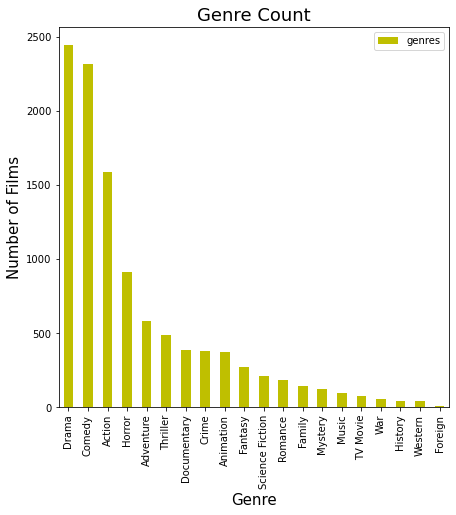

In [43]:
# Plot the genre count in descending order with highest number producted (Drama-Comedy-Action)
df["genres"].value_counts().plot(kind="bar", figsize = (7,7), color = "y"),;
plt.title("Genre Count", size = 18)
plt.xlabel('Genre', size = 15)
plt.ylabel("Number of Films", size = 15)
plt.legend();


In [44]:
#Question 1 : Genre association with revenue/popularity/vote_count as average values with duration informed
# Association between genre and revenue with highest average revenues (Adventure-Science Fiction)
df.groupby("genres")["revenue"].mean().sort_values(ascending=False)

genres
Adventure          1.671059e+08
Science Fiction    1.009330e+08
Fantasy            8.314328e+07
Animation          8.266287e+07
Family             7.833664e+07
Action             7.429041e+07
History            6.536195e+07
War                4.958350e+07
Romance            4.747036e+07
Western            4.730739e+07
Crime              4.686688e+07
Music              3.966570e+07
Comedy             3.847721e+07
Drama              3.592815e+07
Thriller           3.096924e+07
Mystery            3.002289e+07
Horror             2.420624e+07
Documentary        2.311728e+06
TV Movie           7.890419e+05
Foreign            0.000000e+00
Name: revenue, dtype: float64

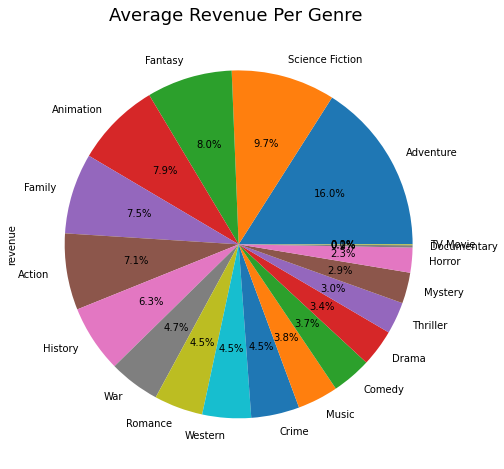

In [45]:
# Plotting the association between genre and average revenue
df.groupby("genres")["revenue"].mean().sort_values(ascending=False).plot(kind="pie", figsize = (8,8), autopct='%1.1f%%');
plt.title("Average Revenue Per Genre ", size = 18);


In [46]:
#Association between genre and populartiy with highest average populartiy(Adventure-Science Fiction)
df.groupby("genres")["popularity"].mean().sort_values(ascending=False)

genres
Adventure          1.221818
Science Fiction    1.087261
Fantasy            0.868512
Animation          0.853864
Action             0.838843
War                0.777887
History            0.764636
Family             0.739779
Romance            0.707231
Crime              0.694063
Western            0.690646
Thriller           0.673381
Mystery            0.596896
Drama              0.554173
Comedy             0.538260
Horror             0.468638
Music              0.462125
TV Movie           0.245873
Documentary        0.184773
Foreign            0.178917
Name: popularity, dtype: float64

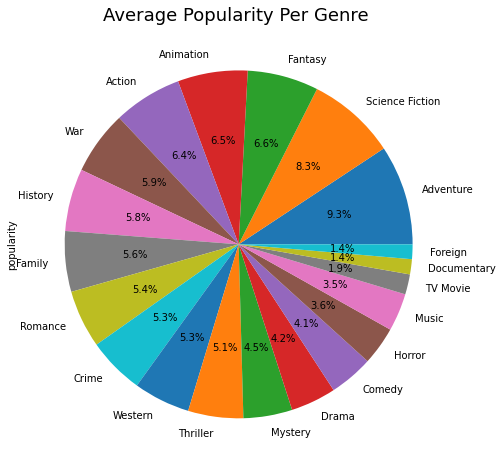

In [47]:
# Plotting the association between genre and average popularity
df.groupby("genres")["popularity"].mean().sort_values(ascending=False).plot(kind="pie", figsize = (8,8),autopct='%1.1f%%');
plt.title("Average Popularity Per Genre ", size = 18);


In [48]:
#Association between genre and vote_count with highest average vote_count(Adventure-Science Fiction)
df.groupby("genres")["vote_count"].mean().sort_values(ascending=False)

genres
Adventure          557.506849
Science Fiction    518.857820
Action             340.248737
Fantasy            316.996310
Animation          303.240642
War                263.931034
History            246.340909
Crime              227.457895
Romance            218.686486
Family             218.521127
Thriller           207.454175
Western            184.523810
Drama              165.982808
Mystery            159.560000
Comedy             142.368353
Horror             121.928884
Music               97.479167
Documentary         35.767442
TV Movie            28.932432
Foreign             20.750000
Name: vote_count, dtype: float64

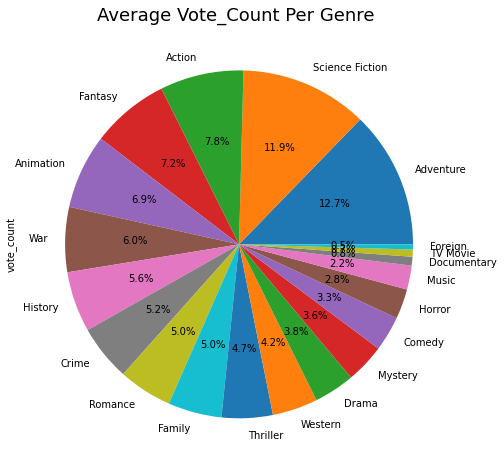

In [49]:
# Plotting the association between genre and average vote_count
df.groupby("genres")["vote_count"].mean().sort_values(ascending=False).plot(kind="pie", figsize = (8,8),autopct='%1.1f%%');
plt.title("Average Vote_Count Per Genre ", size = 18);


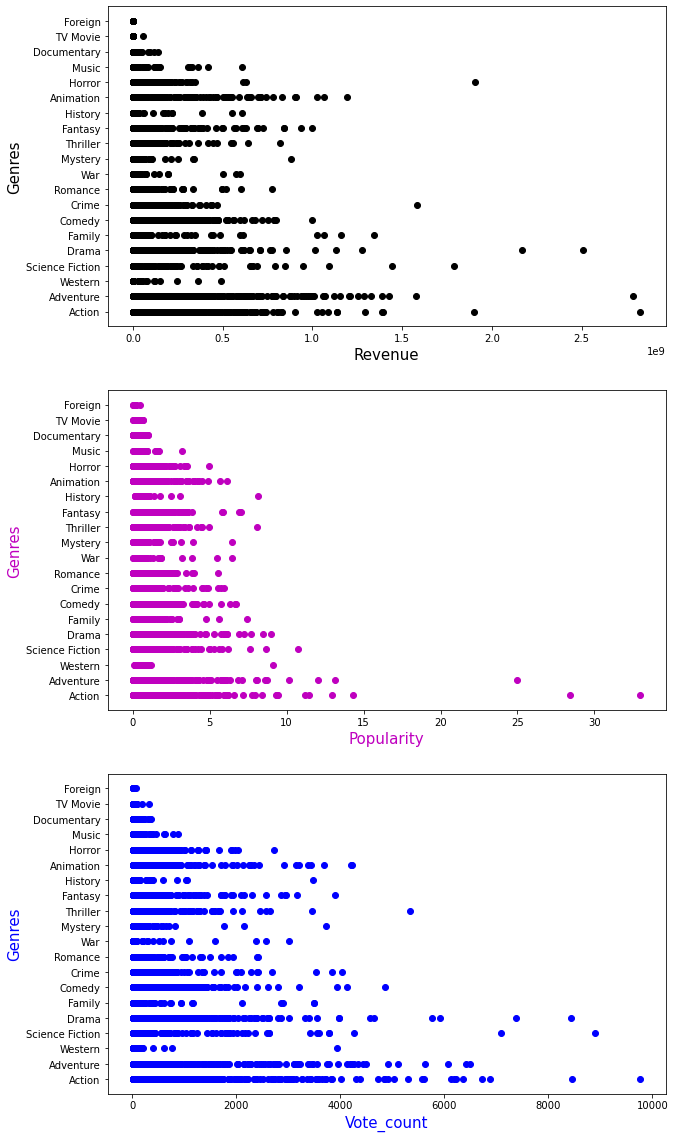

In [50]:
#Question 1 : Genre association with revenue/popularity/vote_count) as absolute values

fig, ax= plt.subplots(3,figsize=(10,20))

ax[0].scatter(x = df["revenue"], y = df["genres"], color = "k")
ax[0].set_xlabel("Revenue", size = 15)
ax[0].set_ylabel("Genres", size = 15)

ax[1].scatter(x = df["popularity"], y = df["genres"], color = "m")
ax[1].set_xlabel("Popularity", size = 15, color = "m")
ax[1].set_ylabel("Genres", size = 15, color = "m")

ax[2].scatter(x = df["vote_count"], y = df["genres"], color = "b")
ax[2].set_xlabel("Vote_count", size = 15, color = "b")
ax[2].set_ylabel("Genres", size = 15, color = "b")

plt.show();


## Question 1: How the film genre is associated with revunue, popularity, and user voting count?

Dataset was investigated for addressing genre (dependent variable) with revenue, popularity, and user voting (three independent variables). The analysis was as follows:
-	Statistical data analysis (Absolute and Average Values )
-	Visual data analysis (Absolute and Average Values )


## Observations:

### Analysis using average values:

##### - Genre/Revenue  &  Genre/Popularity  & Genre/Vote_count:

. Addressing the series statistically and visually shows that the film genre affects/correlates with the revenue/Popularity/Vote_count .The highest average ranking genres for revenue/Popularity/Vote_count as follows:
- 1- Adventure
- 2- Science Fiction
 


### Analysis using absolute values:

##### - Genre/Revenue  &  Genre/Popularity  &  Genre/Vote_count:


. Addressing the series statistically and visually shows that the film genre affects/correlates with the revenue/Popularity/Vote_count. The highest revenue/Popularity/Vote_count ranking genres as follows:

- 1- Action 
- 2- Adventure



## Findings:


### Film genre correlates with revenue, popularity, and vote_count with top genre for (Action) and top average genre for (Adventure) during the period of 1960 till 2015.


>


##  Research Question 2:  (How the budget, revunue, and profit of the film industry were perfoming over the time?)

> In this question, I will investigate the financial performace of the film industry in terms of film budget, revenue, and profit during the examined period. 

> The dependent variable time indicated by (release_time) and the three independent variables are (budget, revenue, and profit)

> I will start by creating (Profit) series in the dataset which quals to subraction of (Revenue and Budget) series. I am assuming that the budget series represent the total cost of the film. 

>

In [51]:
# create new column profit = revenue - budget
profit = df.revenue - df.budget
df = df.assign(profit = profit)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   imdb_id       10726 non-null  object        
 1   popularity    10726 non-null  float64       
 2   film_name     10726 non-null  object        
 3   actor         10726 non-null  object        
 4   director      10726 non-null  object        
 5   runtime       10726 non-null  int64         
 6   genres        10726 non-null  object        
 7   vote_count    10726 non-null  int64         
 8   vote_average  10726 non-null  float64       
 9   release_year  10726 non-null  datetime64[ns]
 10  budget        10726 non-null  float64       
 11  revenue       10726 non-null  float64       
 12  profit        10726 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.4+ MB


In [52]:
# Check the average budget
df.budget.mean()

17773584.649817146

In [53]:
# Check the average revenue
df.revenue.mean()

52030472.50476469

In [54]:
# Check the average profit
df.profit.mean()

34256887.8549477

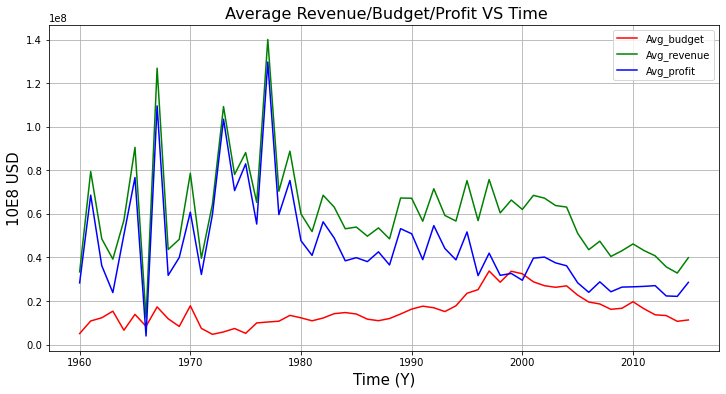

In [55]:
# Question 2: Addressing and plotting average budget/revenue/profit vs time

df["release_year"] = pd.to_numeric(df.release_year)

budget_plot = df.groupby("release_year")["budget"].mean()
budget_plot.plot(style='r', figsize=(12,6),label="Avg_budget")

revenue_plot = df.groupby("release_year")["revenue"].mean()
revenue_plot.plot(style='g', figsize=(12,6),label="Avg_revenue")

profit_plot = df.groupby("release_year")["profit"].mean()
profit_plot.plot(style='b', figsize=(12,6),label="Avg_profit")

plt.title(' Average Revenue/Budget/Profit VS Time', size = 16)
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E8 USD', size = 15)
plt.grid()
plt.legend();

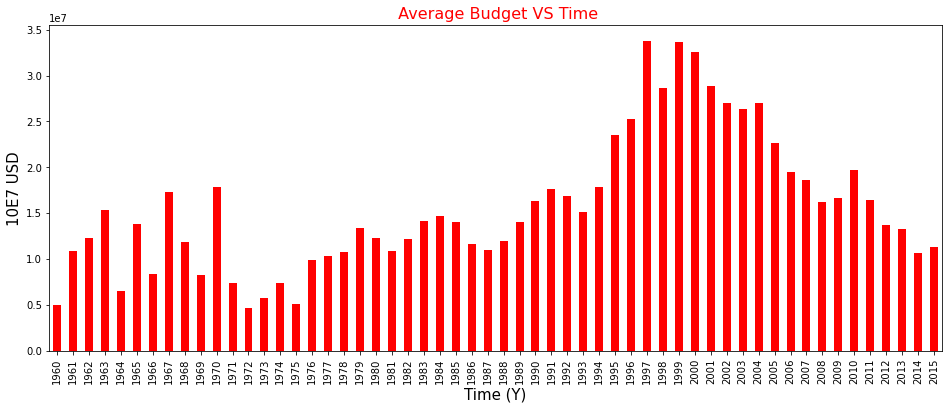

In [56]:
# Plotting average budget vs time
df.groupby("release_year")["budget"].mean().plot(kind="bar", figsize = (16,6), color ="r");
plt.title(' Average Budget VS Time', size = 16, color ="r")
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E7 USD', size = 15);

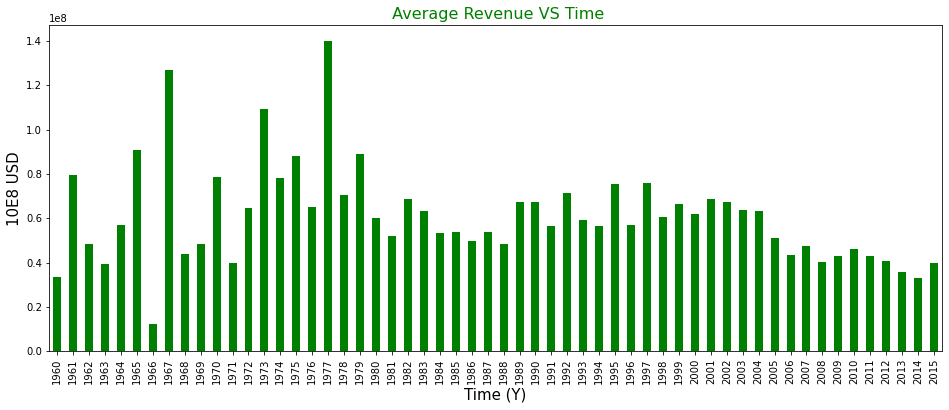

In [57]:
# Plotting average revenue vs time
df.groupby("release_year")["revenue"].mean().plot(kind="bar", figsize = (16,6), color ="g");
plt.title(' Average Revenue VS Time', size = 16, color ="g")
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E8 USD', size = 15);

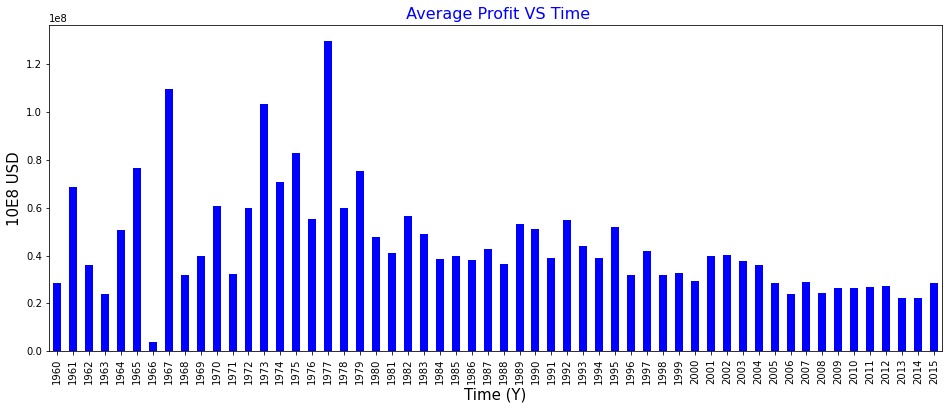

In [58]:
# Plotting average profit vs time
df.groupby("release_year")["profit"].mean().plot(kind="bar", figsize = (16,6), color ="b");
plt.title(' Average Profit VS Time', size = 16, color ="b")
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E8 USD', size = 15);

In [59]:
# Ranking top 10 highest average budget/year
df.groupby("release_year")["budget"].mean().sort_values(ascending=False)[0:10]

release_year
1997    3.379143e+07
1999    3.369195e+07
2000    3.252053e+07
2001    2.882982e+07
1998    2.866274e+07
2002    2.705382e+07
2004    2.696341e+07
2003    2.632182e+07
1996    2.525019e+07
1995    2.356888e+07
Name: budget, dtype: float64

In [60]:
# Ranking top 10 highest average revenue/year
df.groupby("release_year")["revenue"].mean().sort_values(ascending=False)[0:10]

release_year
1977    1.400939e+08
1967    1.269224e+08
1973    1.092939e+08
1965    9.057670e+07
1979    8.880802e+07
1975    8.817223e+07
1961    7.947167e+07
1970    7.866032e+07
1974    7.811482e+07
1997    7.578340e+07
Name: revenue, dtype: float64

In [61]:
# Ranking top 10 highest average profit/year
df.groupby("release_year")["profit"].mean().sort_values(ascending=False)[0:10]

release_year
1977    1.297131e+08
1967    1.096082e+08
1973    1.034728e+08
1975    8.298967e+07
1965    7.669502e+07
1979    7.537640e+07
1974    7.071519e+07
1961    6.861480e+07
1970    6.083370e+07
1972    5.976551e+07
Name: profit, dtype: float64

Text(0.5, 1.0, 'Top 10 Films Average Budget')

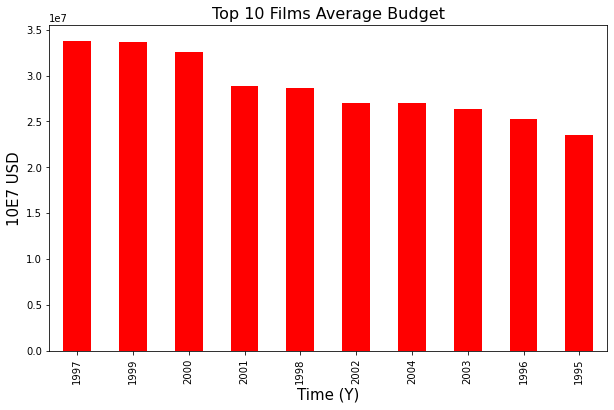

In [62]:
# The highest 10 film average budget per year indicated period (Nineties and the start of the new millennium)
df.groupby("release_year")["budget"].mean().sort_values(ascending=False)[0:10].plot(kind="bar", figsize = (10,6), color ="r");
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E7 USD', size = 15);
plt.title("Top 10 Films Average Budget", size = 16)

Text(0.5, 1.0, 'Top 10 Films Average Revenue')

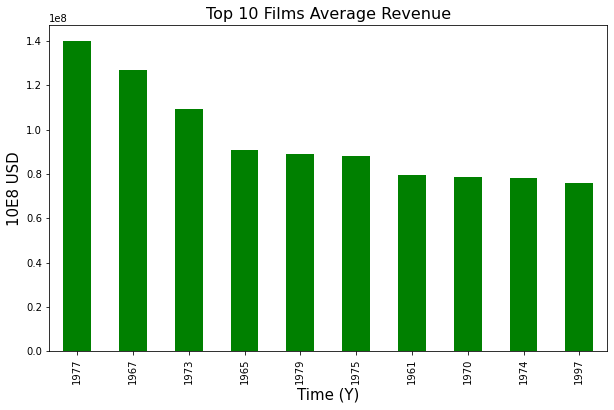

In [63]:
# The highest 10 film average revenue per year indicated period (Sixties and Seventies)
df.groupby("release_year")["revenue"].mean().sort_values(ascending=False)[0:10].plot(kind="bar",figsize = (10,6), color ="g");
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E8 USD', size = 15);
plt.title("Top 10 Films Average Revenue", size = 16)

Text(0.5, 1.0, 'Top 10 Films Average Profit')

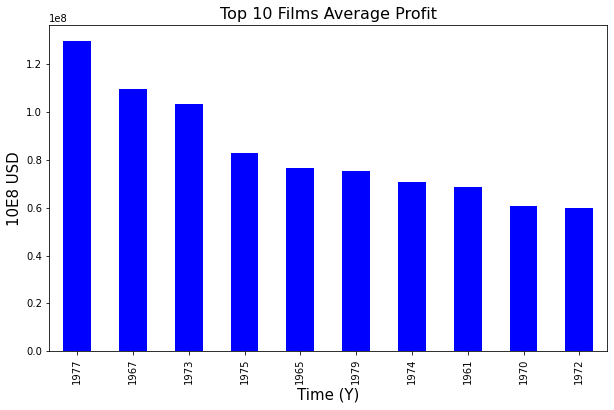

In [64]:
# The highest 10 film average profit per year indicated period (Sixties and Seventies)
df.groupby("release_year")["profit"].mean().sort_values(ascending=False)[0:10].plot(kind="bar", figsize = (10,6), color ="b");
plt.xlabel('Time (Y)', size = 15)
plt.ylabel('10E8 USD', size = 15);
plt.title("Top 10 Films Average Profit", size = 16)

## Question 2: How the budget, revunue, and profit of the film industry were perfoming over the time?

- Dataset was investigated for addressing time as release_year (dependent variable) with budget, revenue, and profit (three independent variables). 

- The analysis was statistical and visual during the examined period.


## Observations:

- The highest peak in the revenue and profit of the film industry was during the seventies with highest average revenue reaching 1.4x10E8 USD and average profit of 1.29x10E8 USD in 1977.
- The increasing budget during late nineties and  21st centry affects drastically the revenue and profit, with highest average budget of 3.37X10E7 in 1997. 
- The huge decline in 1966 in the budget, revenue, and profit of the film industry as shown in the graphs is due to inflation in USA grew as part of the effect to fund the war in Vietnam continued. 



## Findings:

### The film industry performed best in terms of revenue/ profit in the seventies and it declined after due to high budget films starting 1980s till 2015.


>


### Research Question 3: (Who are the top 10 perfoming films/directors/actors in terms on revenues and average voting?)
In this question, I am addressing two dependent variables (revenue and popularity) with three independent variables as follows: 
- film_name
- director  
- actor

#### The analysis shall be as follows:
- Statistical and visual data analysis 


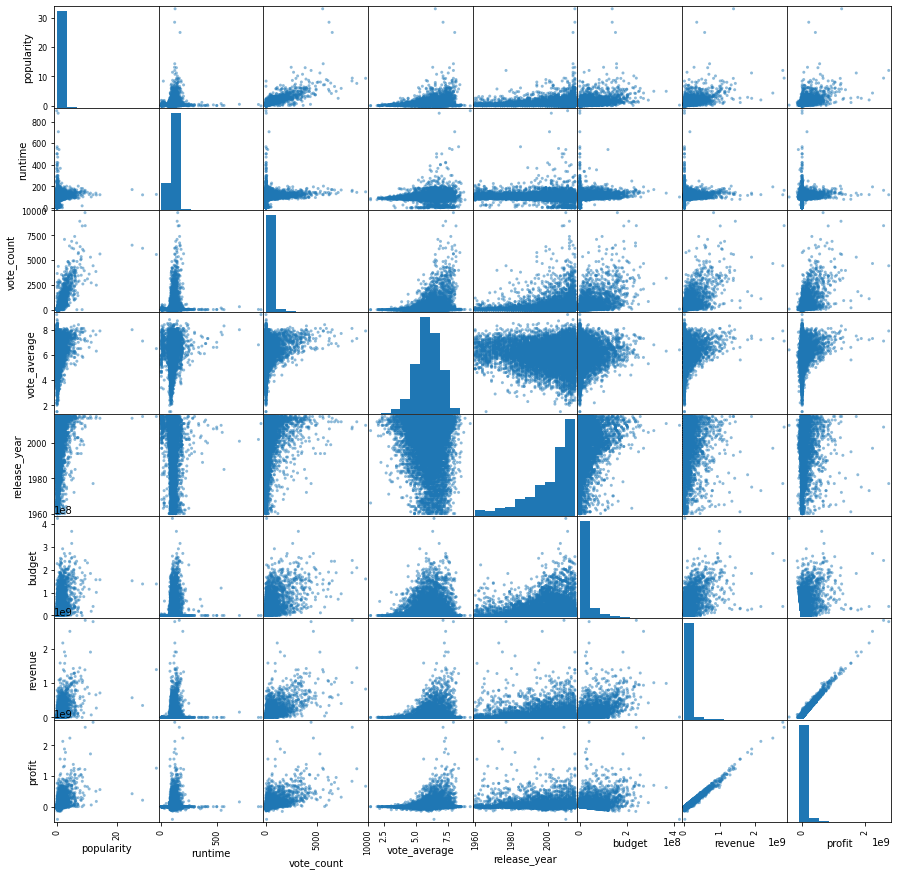

In [65]:
#checking for trends in dataset
pd.plotting.scatter_matrix(df,figsize=(15,15));

In [66]:
# Top 10 revenue films:
df.groupby(["popularity","film_name"])["revenue"].max().sort_values(ascending=False)[0:9]

popularity  film_name                     
9.432768    Avatar                            2.827124e+09
12.037933   Star Wars                         2.789712e+09
4.355219    Titanic                           2.506406e+09
2.010733    The Exorcist                      2.167325e+09
2.563191    Jaws                              1.907006e+09
11.173104   Star Wars: The Force Awakens      1.902723e+09
2.900556    E.T. the Extra-Terrestrial        1.791694e+09
1.136610    The Net                           1.583050e+09
2.631987    One Hundred and One Dalmatians    1.574815e+09
Name: revenue, dtype: float64

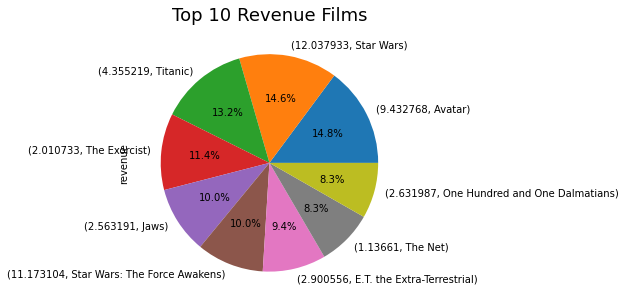

In [67]:
# Plotting top 10 revenue films:
df.groupby(["popularity","film_name"])["revenue"].max().sort_values(ascending=False)[0:9].plot(kind="pie", figsize = (5,5),autopct='%1.1f%%');
plt.title("Top 10 Revenue Films", size = 18);

In [68]:
# Top 10 popluar films:
df.groupby(["revenue","film_name"])["popularity"].max().sort_values(ascending=False)[0:9]

revenue       film_name                          
1.392446e+09  Jurassic World                         32.985763
3.481613e+08  Mad Max: Fury Road                     28.419936
5.726906e+08  Interstellar                           24.949134
7.122911e+08  Guardians of the Galaxy                14.311205
2.716190e+08  Insurgent                              13.112507
6.583651e+08  Captain America: The Winter Soldier    12.971027
2.789712e+09  Star Wars                              12.037933
7.252661e+07  John Wick                              11.422751
1.902723e+09  Star Wars: The Force Awakens           11.173104
Name: popularity, dtype: float64

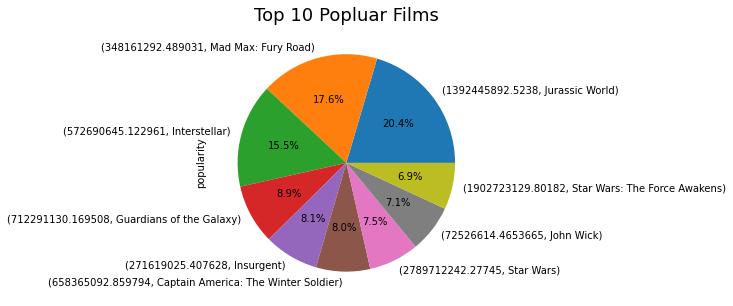

In [69]:
# Plotting top 10 popluar films:
df.groupby(["revenue","film_name"])["popularity"].max().sort_values(ascending=False)[0:9].plot(kind="pie", figsize = (5,5),autopct='%1.1f%%');
plt.title("Top 10 Popluar Films", size = 18);

In [70]:
# Top 10 revenue directors:
df.groupby(["popularity","director"])["revenue"].max().sort_values(ascending=False)[0:9]

popularity  director        
9.432768    James Cameron       2.827124e+09
12.037933   George Lucas        2.789712e+09
4.355219    James Cameron       2.506406e+09
2.010733    William Friedkin    2.167325e+09
2.563191    Steven Spielberg    1.907006e+09
11.173104   J.J. Abrams         1.902723e+09
2.900556    Steven Spielberg    1.791694e+09
1.136610    Irwin Winkler       1.583050e+09
2.631987    Clyde Geronimi      1.574815e+09
Name: revenue, dtype: float64

In [71]:
# Top 10 popular directors:
df.groupby(["revenue","director"])["popularity"].max().sort_values(ascending=False)[0:9]

revenue       director         
1.392446e+09  Colin Trevorrow      32.985763
3.481613e+08  George Miller        28.419936
5.726906e+08  Christopher Nolan    24.949134
7.122911e+08  James Gunn           14.311205
2.716190e+08  Robert Schwentke     13.112507
6.583651e+08  Joe Russo            12.971027
2.789712e+09  George Lucas         12.037933
7.252661e+07  Chad Stahelski       11.422751
1.902723e+09  J.J. Abrams          11.173104
Name: popularity, dtype: float64

In [72]:
# Top 10 revenue actors:
df.groupby(["popularity","actor"])["revenue"].max().sort_values(ascending=False)[0:9]

popularity  actor          
9.432768    Sam Worthington    2.827124e+09
12.037933   Mark Hamill        2.789712e+09
4.355219    Kate Winslet       2.506406e+09
2.010733    Linda Blair        2.167325e+09
2.563191    Roy Scheider       1.907006e+09
11.173104   Harrison Ford      1.902723e+09
2.900556    Henry Thomas       1.791694e+09
1.136610    Sandra Bullock     1.583050e+09
2.631987    Rod Taylor         1.574815e+09
Name: revenue, dtype: float64

In [73]:
# Top 10 popular actors:
df.groupby(["revenue","actor"])["popularity"].max().sort_values(ascending=False)[0:9]

revenue       actor              
1.392446e+09  Chris Pratt            32.985763
3.481613e+08  Tom Hardy              28.419936
5.726906e+08  Matthew McConaughey    24.949134
7.122911e+08  Chris Pratt            14.311205
2.716190e+08  Shailene Woodley       13.112507
6.583651e+08  Chris Evans            12.971027
2.789712e+09  Mark Hamill            12.037933
7.252661e+07  Keanu Reeves           11.422751
1.902723e+09  Harrison Ford          11.173104
Name: popularity, dtype: float64

## Question 3: Who are the top 10 perfoming films/directors/actors in terms of revenues and popularity?

In this question, I am addressing two dependent variable (revenue and popularity) with three independent variables as follows: 
- film_name
- director  
- actor 


## Observations:

### Only two films/directors/actors are common in both top revenue/popualrity films top 10 list as below:

- Film Name / Director/ Actor:                                                   
- Star Wars/George Lucas/Mark Hamill                          (2nd in revenue, 8th in popularity)
- Star Wars: The Force Awakens/ J.J. Abrams/ Harrison Ford    (7th in revenue, 10th in popularity)



## Findings:

###  In the sample examined only 20% of films/directors/actors are common in both revenue/popularity which indicates that most of top revnues films/directors/actors are not receiving high popularity scores by customers.




>





<a id='conclusions'></a>
## Conclusions

### Summary of  findings: 

### Film genre correlates with revenue, popularity, and vote_count with top genre for (Action) and top average genre for (Adventure) during the period of 1960 till 2015

### The film industry performed best in terms of revenue/ profit in the seventies and it declined after due to high budget films starting 1980s till 2015.

###  In the sample examined only 20% of films/directors/actors are common in both revenue/popularity top 10 lists which indicates that the most popular films/directors/actors are not achieving the highest revenues. 

>